In [11]:
# Copy semua kode ini
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
# 1. LOAD DATA
# File ini tidak punya header, jadi tambah header=None
filename = "midterm-regresi-dataset.csv"
try:
    df = pd.read_csv(filename, header=None)
    print("Berhasil load data Regression!")
except FileNotFoundError:
    print(f"ERROR: File {filename} tidak ditemukan.")

Berhasil load data Regression!


In [13]:
# 2. PREPROCESSING
# Kolom pertama (0) adalah Tahun (Target), sisanya adalah Fitur Audio
X = df.iloc[:, 1:].values  # Ambil semua kolom kecuali yg pertama
y = df.iloc[:, 0].values   # Ambil kolom pertama saja (Tahun)

# Split Data (Bagi jadi data belajar & ujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Wajib buat Deep Learning)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# 3. BUAT MODEL NEURAL NETWORK (Deep Learning)
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # Output cuma 1 angka (Tahun)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# 4. TRAINING
print("Mulai Training Deep Learning...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Mulai Training Deep Learning...
Epoch 1/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 11s 994us/step - loss: 58599.9961 - val_loss: 786.4819
Epoch 2/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 10s 954us/step - loss: 483.2353 - val_loss: 205.7709
Epoch 3/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 10s 927us/step - loss: 346.3256 - val_loss: 182.1851
Epoch 4/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 9s 862us/step - loss: 290.4452 - val_loss: 217.4788
Epoch 5/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 9s 919us/step - loss: 272.3232 - val_loss: 229.6530
Epoch 6/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 10s 985us/step - loss: 258.5417 - val_loss: 145.2546
Epoch 7/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 10s 955us/step - loss: 254.9231 - val_loss: 133.9694
Epoch 8/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 10s 969us/step - loss: 227.2980 - val_loss: 126.2405
Epoch 9/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 9s 866us/step - loss: 191.3108 - val_loss: 150.4233
Epoch 10/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 9s 864us/step - loss: 220.5605 - val_loss: 167.1351

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 2s 571us/step - loss: 124.4467

Final MSE Loss: 124.45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Contoh Hasil Prediksi vs Asli:
Prediksi: 2013 | Asli: 2008
Prediksi: 1996 | Asli: 2001
Prediksi: 2005 | Asli: 2006
Prediksi: 1984 | Asli: 2008
Prediksi: 1991 | Asli: 1998


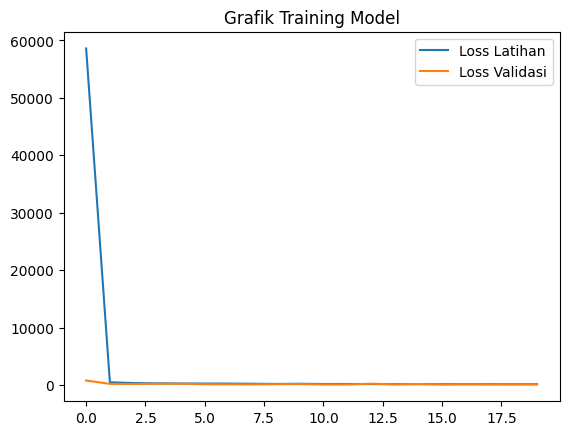

In [17]:
# 5. EVALUASI
loss = model.evaluate(X_test, y_test)
print(f"\nFinal MSE Loss: {loss:.2f}")

# Coba Prediksi
prediksi = model.predict(X_test[:5])
print("\nContoh Hasil Prediksi vs Asli:")
for i in range(5):
    print(f"Prediksi: {prediksi[i][0]:.0f} | Asli: {y_test[i]}")

# Plot Error
plt.plot(history.history['loss'], label='Loss Latihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Training Model')
plt.legend()
plt.show()